# UNIVERSITA' DEGLI STUDI DI NAPOLI FEDERICO II
# NEURAL NETWORK AND DEEP LEARNING
## Authors

    Giuseppe Cicchella N97000452
    Raffaele D'Anna N97000455
    
# Confronto tra l’algoritmo classico di RProp e le sue varianti per la classificazione di immagini MNIST

Questo quaderno Jupyter offre un ambiente interattivo per l’addestramento e l’analisi di reti neurali applicate alla classificazione delle cifre del dataset MNIST, permettendo agli utenti di esplorare diverse configurazioni di reti e algoritmi di ottimizzazione, con particolare focus sulle varianti dell’algoritmo Rprop (STANDARD, RPROP_PLUS, IRPROP).

## Sommario
    
    1. Estrazione e Preparazione del Dataset MNIST
	2. Configurazione delle Reti Neurali
	3. Addestramento con Varianti di Rprop
	4. Valutazione delle Prestazioni con Grafici

## Configurazioni delle Reti Neurali

Gli utenti possono personalizzare la struttura delle reti neurali scegliendo tra diverse configurazioni, inclusa la possibilità di definire:

    • Dimensioni del training e del test set.
	• Numero di strati nascosti.
	• Numero di neuroni per strato.
	• Funzioni di attivazione per ciascun livello.
	
## Personalizzazione dei Parametri di Addestramento

Il quaderno permette una flessibile impostazione dei parametri di addestramento, quali:

	• Numero di epoche.
	• Tasso di apprendimento.
	• Suddivisione del set di addestramento.
	• Numero di ripetizioni, per eseguire più volte l’addestramento con una configurazione fissa, consentendo una valutazione più accurata degli algoritmi.

## Algoritmi di Ottimizzazione Rprop

Sono implementate diverse varianti dell’algoritmo di ottimizzazione Rprop, che possono essere confrontate in termini di efficienza e prestazioni durante l’addestramento delle reti neurali.

## Valutazione delle Prestazioni delle Reti Neurali

Il quaderno fornisce un’analisi completa delle prestazioni delle reti, con le seguenti metriche:
       
    • Tempo di impiegato per l'addestramento complessivo.
	• Errore sui set di addestramento e validazione.
	• Accuratezza sui set di addestramento, validazione e test.
	• Media, Varianza delle Accuratezze sui set di test e addestramento.
	

In [1]:
"""
    1. Estrazione e Preparazione del Dataset MNIST
"""

from nndlpy import MnistDataset as MnistDataset

import numpy as np
import pandas as pd

"""
    Init
"""
# Carica il dataset MNIST CSV con pandas
train_data = pd.read_csv('data/mnist_train.csv')
test_data = pd.read_csv('data/mnist_test.csv')

# Converti i dati in array con numpy
train_array = np.array(train_data)
test_array = np.array(test_data)

# Definisci le dimensioni del training e test set
train_set_size = 50000  # Almeno 10.000 campioni per il training
test_set_size = 10000    # Almeno 2.500 campioni per il test

"""
    Validation Set
"""
# Mescola i dati di training casualmente
np.random.shuffle(train_array)
# Calcola l'indice per il validation set (esempio: il 20% del training set)
val_index = int(np.ceil(train_set_size * 0.20))
# Estrai il validation set dal training array
validation_array = train_array[:val_index - 1]
# Estrai il validation set
validation_X, validation_Y = MnistDataset.get_mnist_validation(validation_array)

"""
    Training Set
"""
# Estrai il training set rimanente (senza i dati di validation)
train_array_reduced = train_array[val_index:train_set_size]
# Estrai il training set (dopo aver rimosso i dati di validazione)
train_X, train_Y = MnistDataset.get_mnist_training(train_array_reduced)

"""
    Test Set
"""
# Estrai il test set direttamente dal file di test
test_X, test_Y = MnistDataset.get_mnist_test(test_array, test_set_size)

print("\nEstrazione e Preparazione del Dataset MNIST avvenuta con successo.")


Estrazione e Preparazione del Dataset MNIST avvenuta con successo.


In [2]:
"""
    2. Configurazione delle Reti Neurali
"""

from nndlpy import ActivationFunctions as ActivationFunctions
from nndlpy import LossFunctions as LossFunctions
from nndlpy import NeuralNetwork as NeuralNetwork

# Parametri di addestramento
epochs = 35
learning_rate = 0.00001
num_of_networks = 20  # Definisci quante reti testare (maggiore di 0)

# Funzioni di attivazione per i layer nascosti
hidden_activation_funcs = [ActivationFunctions.relu]
# Funzione di attivazione per l'output
output_activation_func = ActivationFunctions.identity
#Funzione di perdita per l'output
loss_func = LossFunctions.cross_entropy_softmax

# Numero di neuroni per ciascun layer nascosto
hidden_layers_sizes = [32]

# Dimensione dell'input e dell'output (numero di neuroni nel primo e ultimo layer)
input_layer_size = train_X.shape[0]
output_layer_size = train_Y.shape[0]

# Creazione e inizializzazione delle reti neurali
neural_networks = []

for run in range(num_of_networks):
    try:
        # Inizializza una nuova rete neurale con la configurazione corrente
        network = NeuralNetwork.NeuralNetwork(
            hidden_activation_funcs,
            output_activation_func,
            loss_func,
            input_layer_size,
            hidden_layers_sizes,
            output_layer_size
        )
        print(f"Rete neurale {run + 1} inizializzata con successo.")
    except ValueError as exception:
        print(f"Errore durante l'inizializzazione della rete {run + 1}: {exception}")
        continue
    
    # Aggiungi la rete neurale alla lista di reti
    neural_networks.append(network)

    # Modifica l'architettura rimuovendo l'ultima funzione di attivazione per la prossima rete (se necessario)
    if hidden_activation_funcs:
        hidden_activation_funcs = hidden_activation_funcs[:-1]
    
# Mostra la struttura della prima rete
print("\nArchitettura della prima rete:")
neural_networks[0].get_network()

Rete neurale 1 inizializzata con successo.
Rete neurale 2 inizializzata con successo.
Rete neurale 3 inizializzata con successo.
Rete neurale 4 inizializzata con successo.
Rete neurale 5 inizializzata con successo.
Rete neurale 6 inizializzata con successo.
Rete neurale 7 inizializzata con successo.
Rete neurale 8 inizializzata con successo.
Rete neurale 9 inizializzata con successo.
Rete neurale 10 inizializzata con successo.
Rete neurale 11 inizializzata con successo.
Rete neurale 12 inizializzata con successo.
Rete neurale 13 inizializzata con successo.
Rete neurale 14 inizializzata con successo.
Rete neurale 15 inizializzata con successo.
Rete neurale 16 inizializzata con successo.
Rete neurale 17 inizializzata con successo.
Rete neurale 18 inizializzata con successo.
Rete neurale 19 inizializzata con successo.
Rete neurale 20 inizializzata con successo.

Architettura della prima rete:
Numero di layer nascosti: 1
Dimensione dell'input: 784
Dimensione dell'output: 10
Neuroni nei lay

In [3]:
"""
    3. Addestramento con Varianti di Rprop (STANDARD, RPROP_PLUS, IRPROP)
"""

from src.nndlpy.NeuralNetwork import calculate_mean_and_variance
from matplotlib import pyplot as plt

# Inizializza le liste per memorizzare le metriche per ogni metodo Rprop
std_metrics_mean = []
plus_metrics_mean = []
istd_metrics_mean = []

# Definisci i metodi Rprop da utilizzare
rprop_methods = ['STANDARD', 'RPROP_PLUS', 'IRPROP']
average_training_times = []

# Ciclo sui metodi Rprop
for rprop_method in rprop_methods:
    print(f'\nInizio addestramento con Rprop metodo: {rprop_method}')

    total_training_time = 0
    std_test_accuracies = []
    
    results_metrics = []
    trained_networks = []
    
    # Esegui il ciclo per il numero di reti specificato
    for run in range(num_of_networks):
        training_network = neural_networks[run].clone_network()
        print(f'\nEsecuzione numero {run + 1} per il metodo {rprop_method}')

        # Addestramento utilizzando il metodo Rprop corrente
        metrics = training_network.train_model(train_X, train_Y, validation_X, validation_Y,
                                               num_epochs=epochs, learning_rate=learning_rate,
                                               rprop_method=rprop_method)

        # Salva la rete addestrata e i risultati
        trained_networks.append(training_network)
        results_metrics.append(metrics)

        # Stampa dell'accuratezza
        std_test_accuracies.append(training_network.print_accuracies(f'\nTest {rprop_method} - Run {run + 1}', 
                                                                     test_X, test_Y, train_X, train_Y))

        total_training_time += round(metrics[4], 5)  # metrics[4] è elapsed_time

    # Calcola media e varianza delle metriche
    metrics_mean, metrics_variance, _, _ = calculate_mean_and_variance(results_metrics, epochs, num_of_networks)
    
    # Salva le metriche medie per ogni metodo
    if rprop_method == 'STANDARD':
        std_metrics_mean = metrics_mean
    elif rprop_method == 'RPROP_PLUS':
        plus_metrics_mean = metrics_mean
    elif rprop_method == 'IRPROP':
        istd_metrics_mean = metrics_mean

    # Calcola il tempo medio di addestramento
    average_training_time = total_training_time / num_of_networks
    average_training_times.append(average_training_time)
    print(f'Tempo medio di addestramento per {rprop_method}: {round(average_training_time, 5)} secondi')



Inizio addestramento con Rprop metodo: STANDARD

Esecuzione numero 1 per il metodo STANDARD

Epoch: 0/35   Rprop used: STANDARD
    Training Accuracy: 0.084,       Training Loss: 97395.45083;
    Validation Accuracy: 0.08781,     Validation Loss: 24346.57945


Epoch: 1/35   Rprop used: STANDARD
    Training Accuracy: 0.13145,       Training Loss: 90716.46624;
    Validation Accuracy: 0.13161,     Validation Loss: 22670.64894


Epoch: 2/35   Rprop used: STANDARD
    Training Accuracy: 0.39475,       Training Loss: 182270.54087;
    Validation Accuracy: 0.39744,     Validation Loss: 45667.39582


Epoch: 3/35   Rprop used: STANDARD
    Training Accuracy: 0.31575,       Training Loss: 442798.05225;
    Validation Accuracy: 0.31623,     Validation Loss: 111106.59923


Epoch: 4/35   Rprop used: STANDARD
    Training Accuracy: 0.40148,       Training Loss: 86862.94905;
    Validation Accuracy: 0.39764,     Validation Loss: 21727.83052


Epoch: 5/35   Rprop used: STANDARD
    Training Accurac

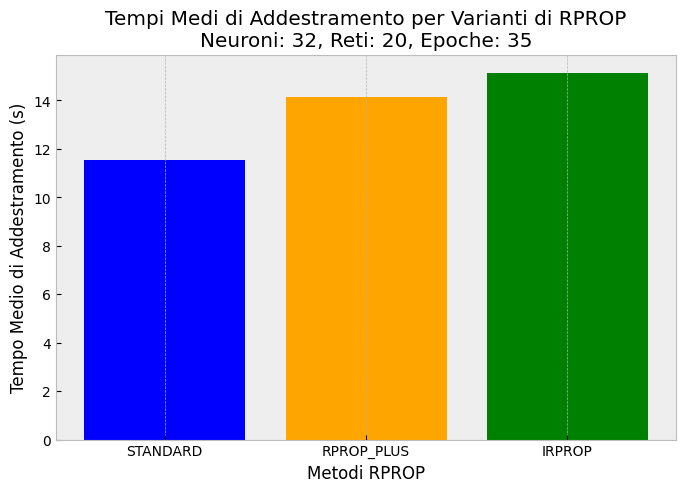

In [4]:
"""
    4. Valutazione delle Prestazioni con Grafici sul Tempo Medio di Addestramento, Errore Medio e Accuratezza media su Training e Validation Set 
"""
import os

path = f'results/[{num_of_networks}]Reti/{hidden_layers_sizes}Neuroni'

if not os.path.exists(path):
            os.makedirs(path)
            
# Creazione e stampa del grafico del tempo medio di addestramento 
plt.style.use('bmh')
plt.figure(figsize=(8, 5))
plt.bar(rprop_methods, average_training_times, color=['blue', 'orange', 'green'])
plt.title(f'Tempi Medi di Addestramento per Varianti di RPROP\n'
          f'Neuroni: {", ".join(map(str, hidden_layers_sizes))}, Reti: {num_of_networks}, Epoche: {epochs}')
plt.xlabel('Metodi RPROP')
plt.ylabel('Tempo Medio di Addestramento (s)')
plt.grid(axis='y')
plt.savefig(f'{path}/{",".join(map(str, hidden_layers_sizes))}_neuroni_{num_of_networks}_reti_{epochs}_epoche_tempo_medio_di_addestramento.png')
plt.show()
plt.close()

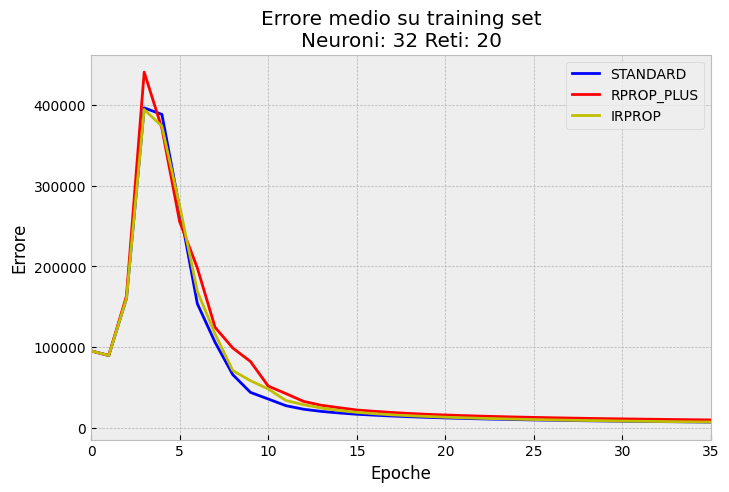

In [5]:
# Creazione e stampa del grafico dell'errore medio del training set
plt.style.use('bmh')
plt.figure(figsize=(8, 5))
plt.plot(std_metrics_mean[0], 'b', label='STANDARD')
plt.plot(plus_metrics_mean[0], 'r', label='RPROP_PLUS')
plt.plot(istd_metrics_mean[0], 'y', label='IRPROP')
plt.title(f'Errore medio su training set\nNeuroni: {", ".join(map(str, hidden_layers_sizes))} Reti: {num_of_networks}')
plt.xlabel('Epoche')
plt.ylabel('Errore')
plt.legend()
plt.grid(True)
plt.xlim(0, epochs)
plt.savefig(f'{path}/{",".join(map(str, hidden_layers_sizes))}_neuroni_errore_medio_training_set.png')
plt.show()
plt.close()

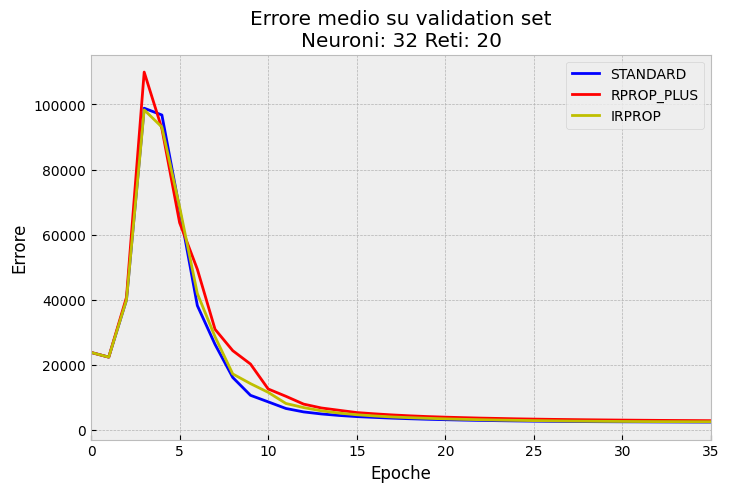

In [6]:
# Creazione e stampa del grafico dell'errore medio del validation set
plt.style.use('bmh')
plt.figure(figsize=(8, 5))
plt.plot(std_metrics_mean[1], 'b', label='STANDARD')
plt.plot(plus_metrics_mean[1], 'r', label='RPROP_PLUS')
plt.plot(istd_metrics_mean[1], 'y', label='IRPROP')
plt.title(f'Errore medio su validation set\nNeuroni: {", ".join(map(str, hidden_layers_sizes))} Reti: {num_of_networks}')
plt.xlabel('Epoche')
plt.ylabel('Errore')
plt.legend()
plt.grid(True)
plt.xlim(0, epochs)
plt.savefig(f'{path}/{",".join(map(str, hidden_layers_sizes))}_neuroni_errore_medio_validation_set.png')
plt.show()
plt.close()

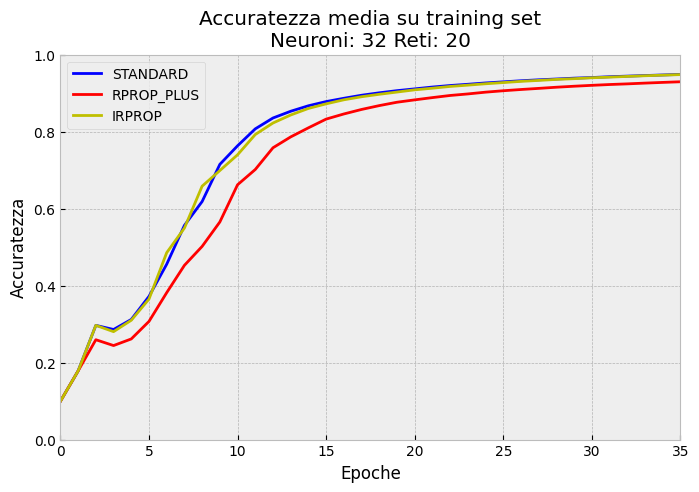

In [7]:
# Creazione e stampa del grafico dell'accuratezza media del training set
plt.style.use('bmh')
plt.figure(figsize=(8, 5))
plt.plot(std_metrics_mean[2], 'b', label='STANDARD')
plt.plot(plus_metrics_mean[2], 'r', label='RPROP_PLUS')
plt.plot(istd_metrics_mean[2], 'y', label='IRPROP')
plt.title(f'Accuratezza media su training set\nNeuroni: {", ".join(map(str, hidden_layers_sizes))} Reti: {num_of_networks}')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.xlim(0, epochs)
plt.savefig(f'{path}/{",".join(map(str, hidden_layers_sizes))}_neuroni_accuratezza_media_training_set.png')
plt.show()
plt.close()

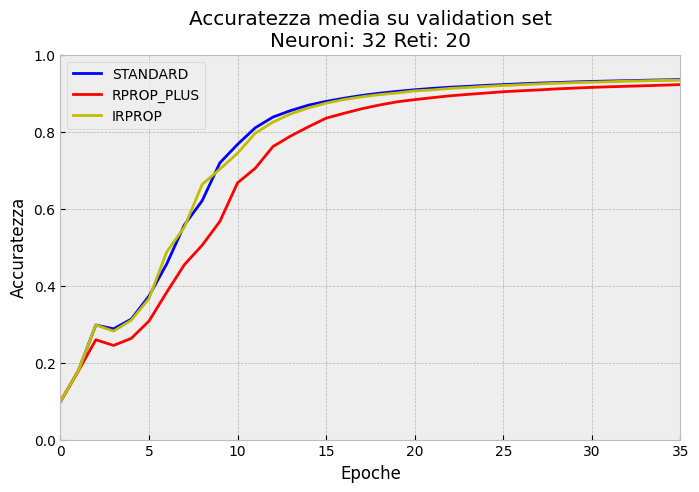

In [8]:
# Creazione e stampa del grafico dell'accuratezza media del validation set
plt.style.use('bmh')
plt.figure(figsize=(8, 5))
plt.plot(std_metrics_mean[3],  'b', label='STANDARD')
plt.plot(plus_metrics_mean[3], 'r', label='RPROP_PLUS')
plt.plot(istd_metrics_mean[3], 'y', label='IRPROP')
plt.title(f'Accuratezza media su validation set\nNeuroni: {", ".join(map(str, hidden_layers_sizes))} Reti: {num_of_networks}')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.xlim(0, epochs)
plt.savefig(f'{path}/{",".join(map(str, hidden_layers_sizes))}_neuroni_accuratezza_media_validation_set.png')
plt.show()
plt.close()